## **1. XR차트 XS 차트를 위한 Python library 불러오기**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-v0_8-colorblind')

## **2. XR 차트와 XS 차트 클래스 정의**

In [29]:
# XR_ControlChart
class XR_ControlChart:

    def fit(self,data):

        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()

        self.data = data

    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean()
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean()
        lcl_R   = D3*self.R.mean()

        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")

In [30]:
class XS_ControlChart:

    def fit(self,data):

        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.S = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.S[i] = data[i].std()

        self.data = data

    def ControlChart(self,A3,B3,B4):

        ucl_X   = self.X.mean() + A3*self.S.mean()
        cl_X    = self.X.mean()
        lcl_X   = self.X.mean() - A3*self.S.mean()

        ucl_S   = B4*self.S.mean()
        cl_S    = self.S.mean()
        lcl_S   = B3*self.S.mean()

        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.S,marker="o",color="k",label="S")
        plt.plot([ucl_S]*len(self.X),color="r",label="UCL={}".format(ucl_S.round(2)))
        plt.plot([cl_S]*len(self.X),color="b",label="CL={}".format(cl_S.round(2)))
        plt.plot([lcl_S]*len(self.X),color="r",label="LCL={}".format(lcl_S.round(2)))
        plt.title("S Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.S)
        plt.title("Boxplot S")
        plt.xlabel("S")
        plt.show()

## **3. 데이터 불러오기**

In [31]:
# 데이터 불러오기

data = np.array([[20, 22, 21, 23, 22],
       [19, 18, 22, 20, 20],
       [25, 18, 20, 17, 22],
       [20, 21, 22, 21, 21],
       [19, 24, 23, 22, 20],
       [22, 20, 18, 18, 19],
       [18, 20, 19, 18, 19],
       [20, 18, 23, 20, 21],
       [21, 20, 24, 23, 22],
       [21, 19, 20, 20, 20],
       [20, 20, 23, 22, 20],
       [22, 21, 20, 22, 23],
       [19, 22, 19, 18, 19],
       [20, 21, 22, 21, 22],
       [20, 24, 24, 23, 23],
       [21, 20, 24, 20, 21],
       [20, 18, 18, 20, 20],
       [20, 24, 22, 23, 23],
       [20, 19, 23, 20, 19],
       [22, 21, 21, 24, 22],
       [23, 22, 22, 20, 22],
       [21, 18, 18, 17, 19],
       [21, 24, 24, 23, 23],
       [20, 22, 21, 21, 20],
       [19, 20, 21, 21, 22]])

data = np.delete(data,9,axis = 0)  # 10,11,12
data = np.delete(data,9,axis = 0)
data = np.delete(data,9,axis = 0)
data.shape

(22, 5)

## **4. XR & XS 관리도 작성**
### **4.1 XR 관리도**

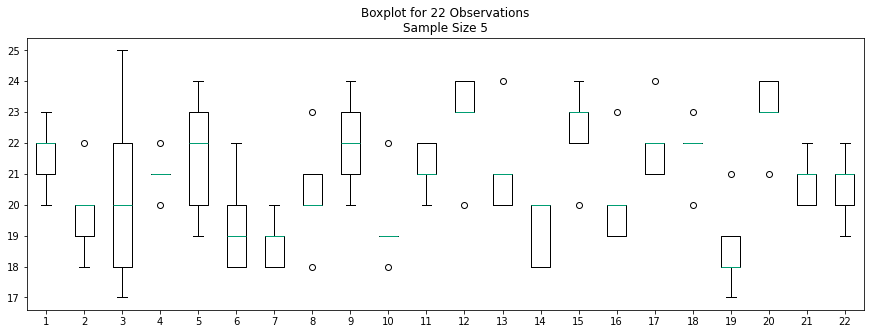

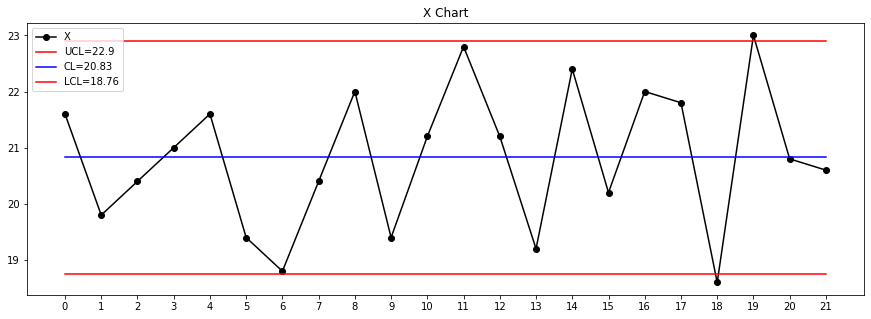

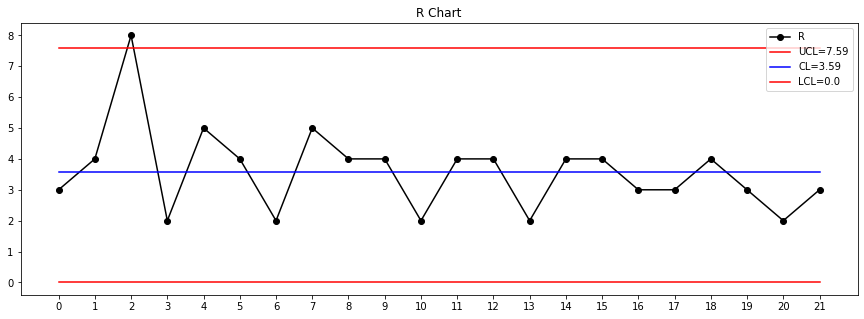

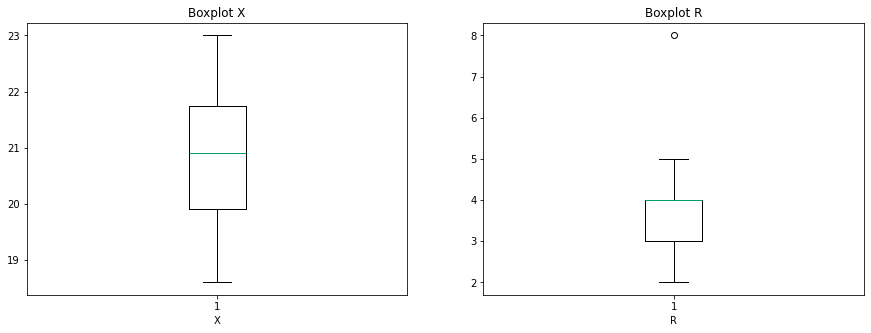

In [32]:
chart = XR_ControlChart()
chart.fit(data)
chart.ControlChart(A2 = 0.577,D3 = 0 ,D4 = 2.115)

### **R관리도에서 2번째 sample이 관리 이탈 (원자재 불량), 2번째 sample을 제거하고 다시 R 관리도 그림**

In [33]:
#2번째 sample 제거

data1 = np.delete(data,1,axis = 0)  # 2번째

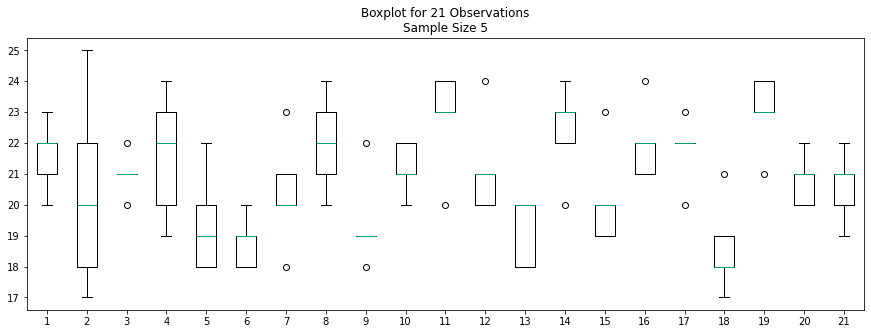

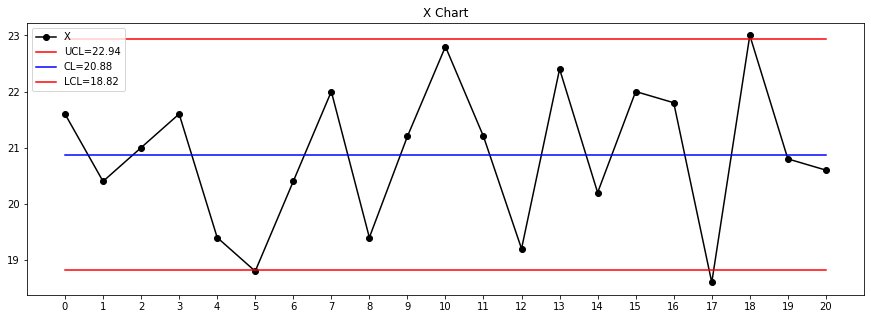

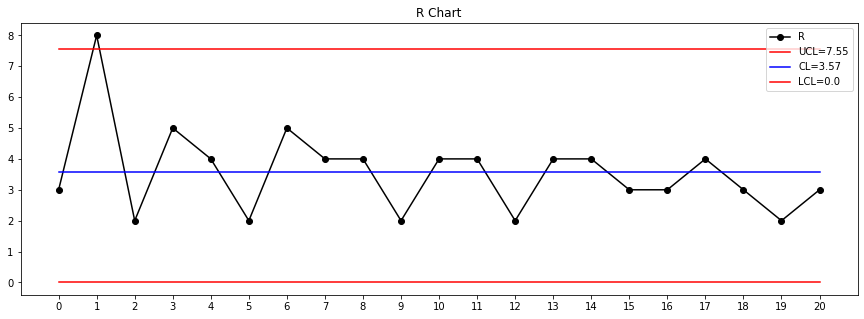

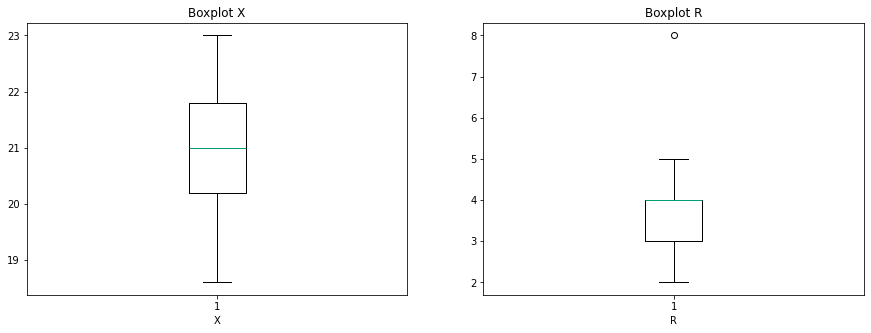

In [34]:
chart = XR_ControlChart()
chart.fit(data1)
chart.ControlChart(A2 = 0.577,D3 = 0 ,D4 = 2.115)

### **5, 20, 21 sample 관리 이탈. 이유를 밝히고 제거하고 다시 R관리도, X 관리도 작성**

In [35]:
#4, 16, 17번째 sample 제거
data2 = np.delete(data1,17,axis = 0)  
data2 = np.delete(data1,16,axis = 0)  
data2 = np.delete(data1,4,axis = 0)  

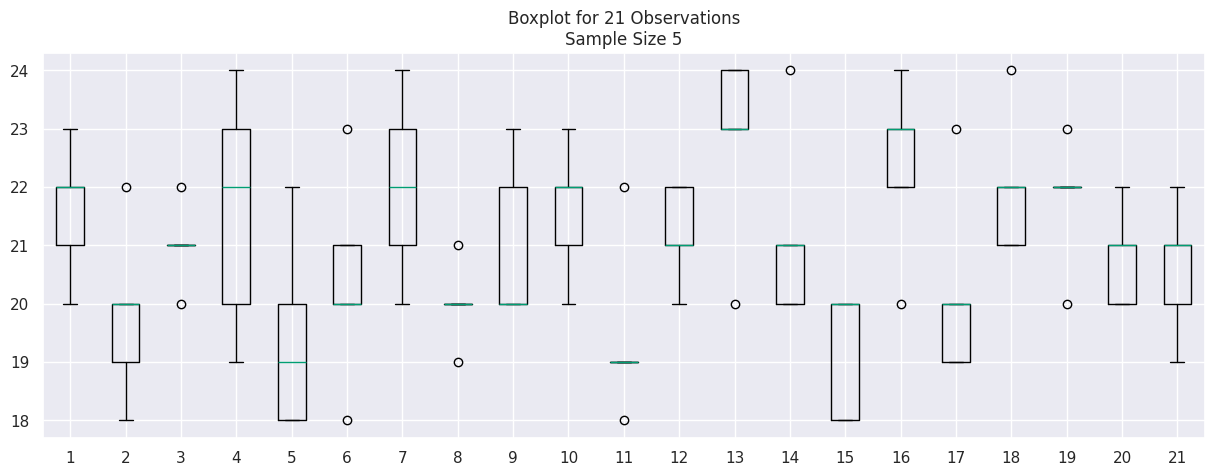

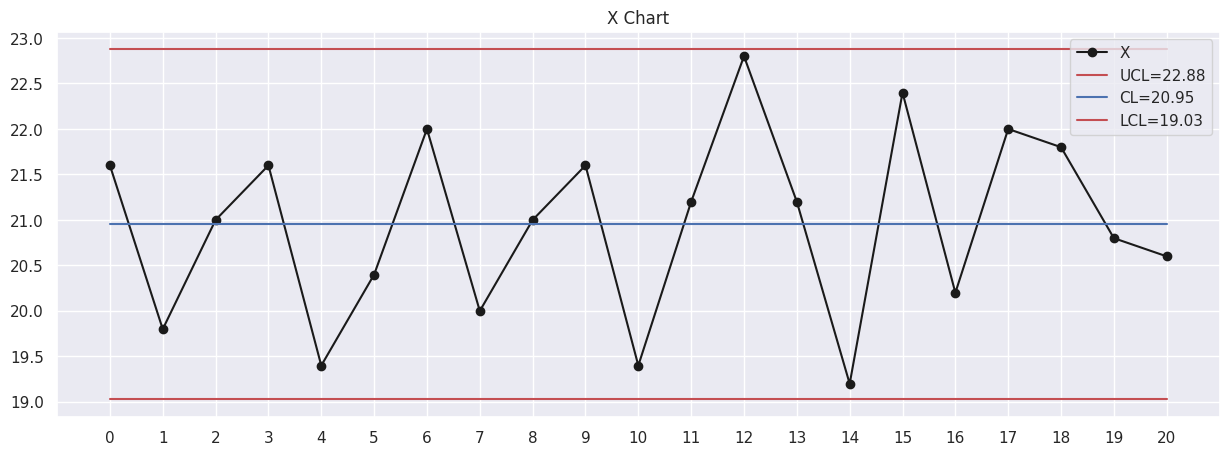

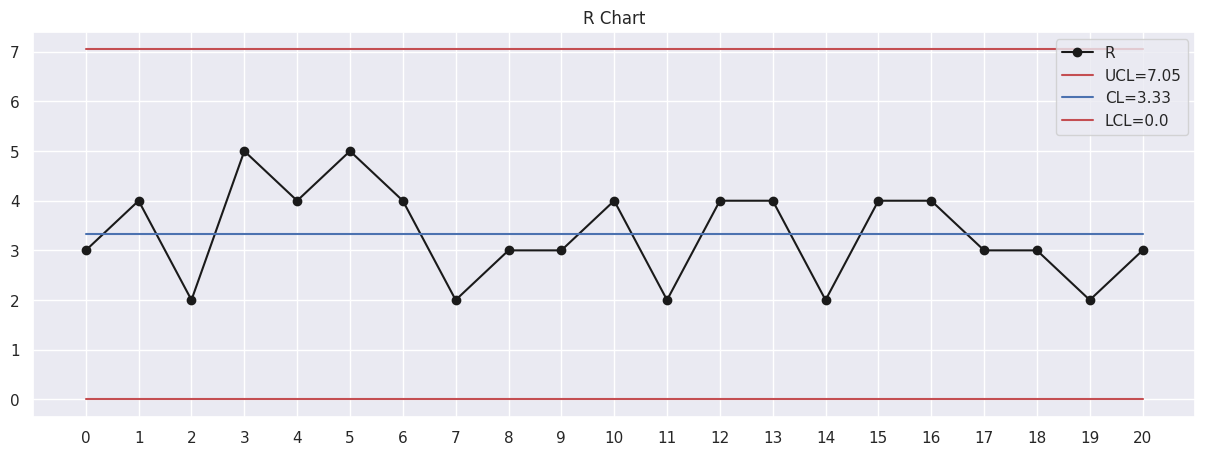

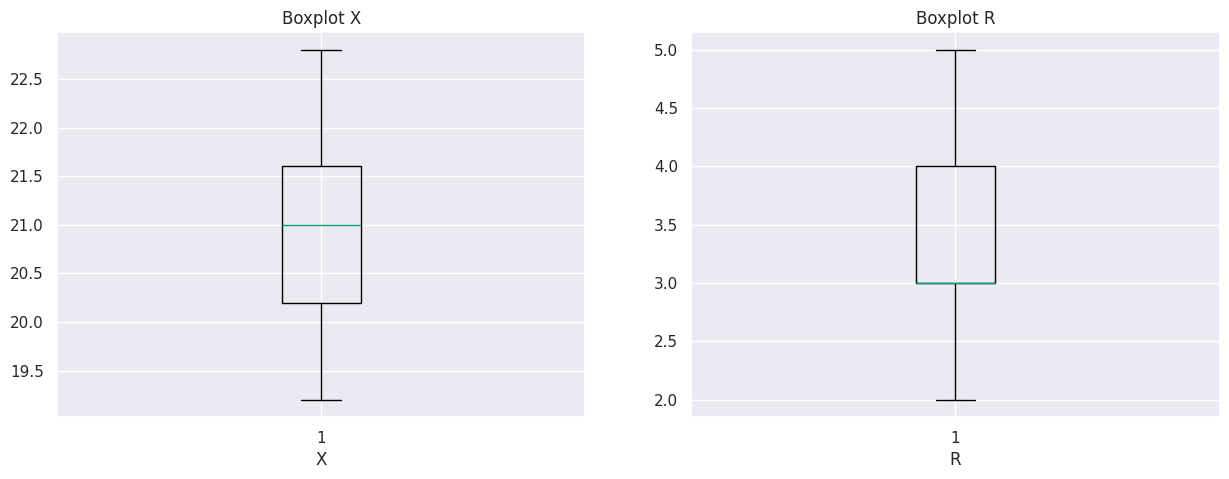

In [17]:
chart = XR_ControlChart()
chart.fit(data2)
chart.ControlChart(A2 = 0.577,D3 = 0 ,D4 = 2.115)

### **4.2 XS 관리도**

In [37]:
data = np.array([[20, 22, 21, 23, 22],
       [19, 18, 22, 20, 20],
       [25, 18, 20, 17, 22],
       [20, 21, 22, 21, 21],
       [19, 24, 23, 22, 20],
       [22, 20, 18, 18, 19],
       [18, 20, 19, 18, 19],
       [20, 18, 23, 20, 21],
       [21, 20, 24, 23, 22],
       [21, 19, 20, 20, 20],
       [20, 20, 23, 22, 20],
       [22, 21, 20, 22, 23],
       [19, 22, 19, 18, 19],
       [20, 21, 22, 21, 22],
       [20, 24, 24, 23, 23],
       [21, 20, 24, 20, 21],
       [20, 18, 18, 20, 20],
       [20, 24, 22, 23, 23],
       [20, 19, 23, 20, 19],
       [22, 21, 21, 24, 22],
       [23, 22, 22, 20, 22],
       [21, 18, 18, 17, 19],
       [21, 24, 24, 23, 23],
       [20, 22, 21, 21, 20],
       [19, 20, 21, 21, 22]])


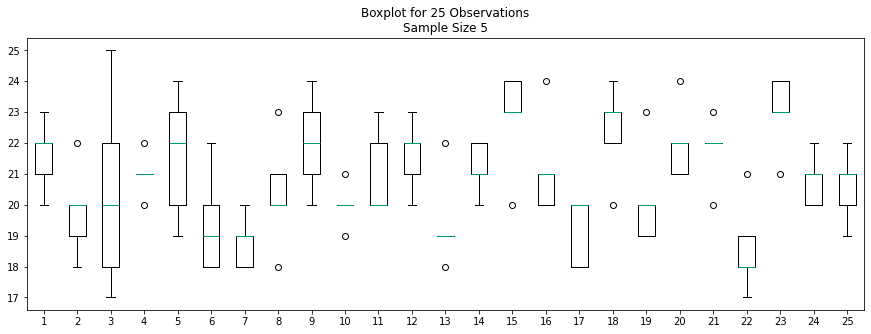

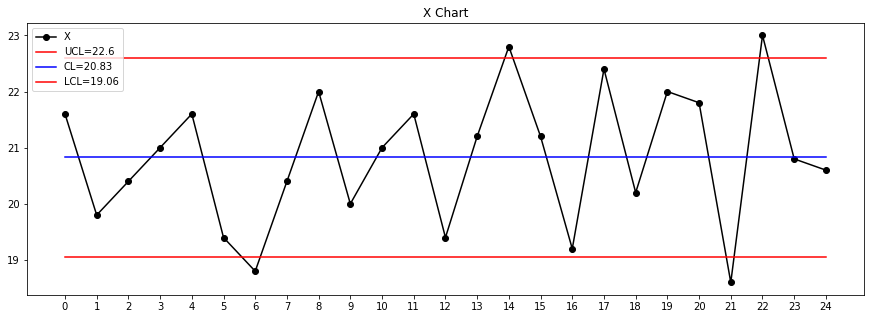

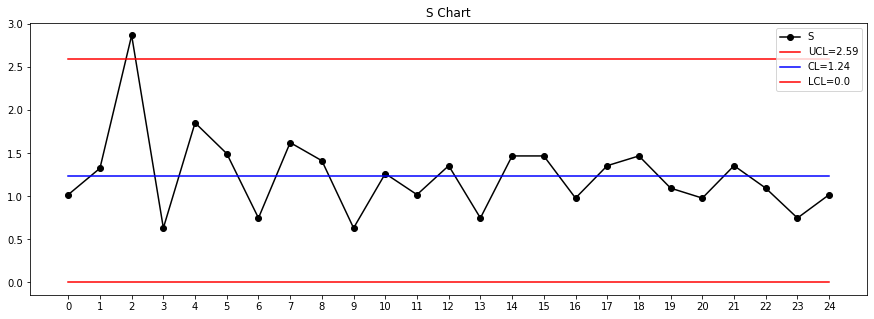

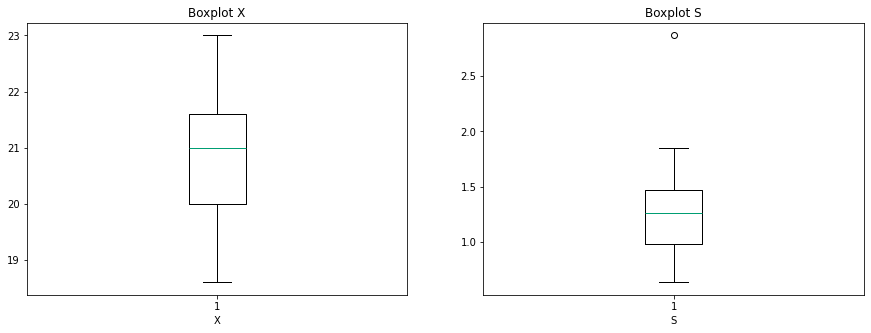

In [38]:
chart = XS_ControlChart()
chart.fit(data)
chart.ControlChart(A3 = 1.427 ,B3 = 0 ,B4 = 2.089)

### **S관리도에서 2번째 sample이 관리 이탈 (원자재 불량), 2번째 sample을 제거하고 다시 S 관리도 그림**

In [39]:
#2번째 sample 제거

data1 = np.array([[20, 22, 21, 23, 22],
       [19, 18, 22, 20, 20],
       [20, 21, 22, 21, 21],
       [19, 24, 23, 22, 20],
       [22, 20, 18, 18, 19],
       [18, 20, 19, 18, 19],
       [20, 18, 23, 20, 21],
       [21, 20, 24, 23, 22],
       [21, 19, 20, 20, 20],
       [20, 20, 23, 22, 20],
       [22, 21, 20, 22, 23],
       [19, 22, 19, 18, 19],
       [20, 21, 22, 21, 22],
       [20, 24, 24, 23, 23],
       [21, 20, 24, 20, 21],
       [20, 18, 18, 20, 20],
       [20, 24, 22, 23, 23],
       [20, 19, 23, 20, 19],
       [22, 21, 21, 24, 22],
       [23, 22, 22, 20, 22],
       [21, 18, 18, 17, 19],
       [21, 24, 24, 23, 23],
       [20, 22, 21, 21, 20],
       [19, 20, 21, 21, 22]])

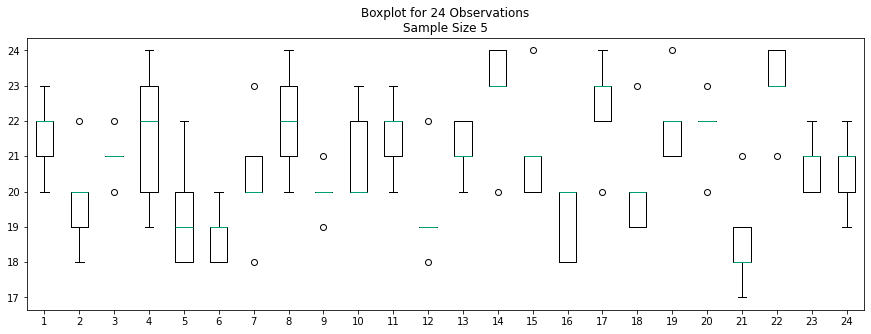

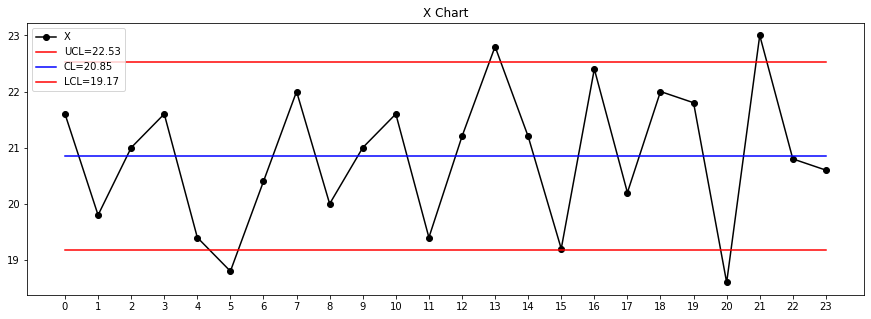

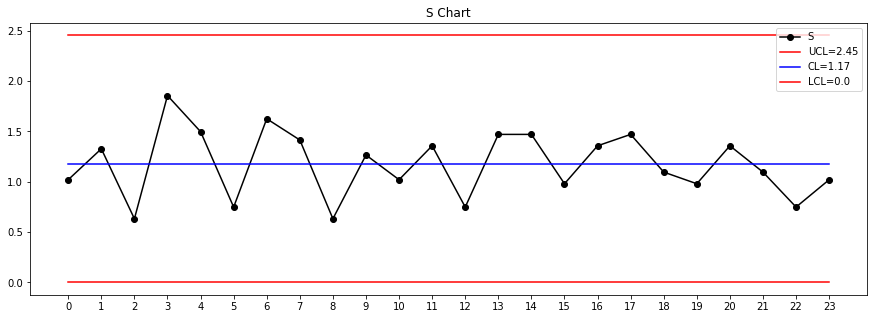

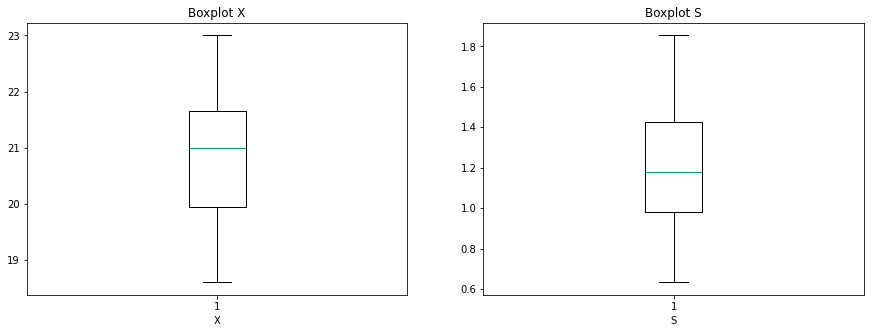

In [40]:
chart = XS_ControlChart()
chart.fit(data1)
chart.ControlChart(A3 = 1.427 ,B3 = 0 ,B4 = 2.089)

### **5, 13, 20, 21 sample 관리 이탈. 이유를 밝히고 제거하고 다시 S관리도, X 관리도 작성**

In [41]:
#5, 13, 20, 21번째 sample 제거

data2 = np.array([[20, 22, 21, 23, 22],
       [19, 18, 22, 20, 20],
       [20, 21, 22, 21, 21],
       [19, 24, 23, 22, 20],
       [22, 20, 18, 18, 19],
       [20, 18, 23, 20, 21],
       [21, 20, 24, 23, 22],
       [21, 19, 20, 20, 20],
       [20, 20, 23, 22, 20],
       [22, 21, 20, 22, 23],
       [19, 22, 19, 18, 19],
       [20, 21, 22, 21, 22],
       [21, 20, 24, 20, 21],
       [20, 18, 18, 20, 20],
       [20, 24, 22, 23, 23],
       [20, 19, 23, 20, 19],
       [22, 21, 21, 24, 22],
       [23, 22, 22, 20, 22],
       [20, 22, 21, 21, 20],
       [19, 20, 21, 21, 22]])

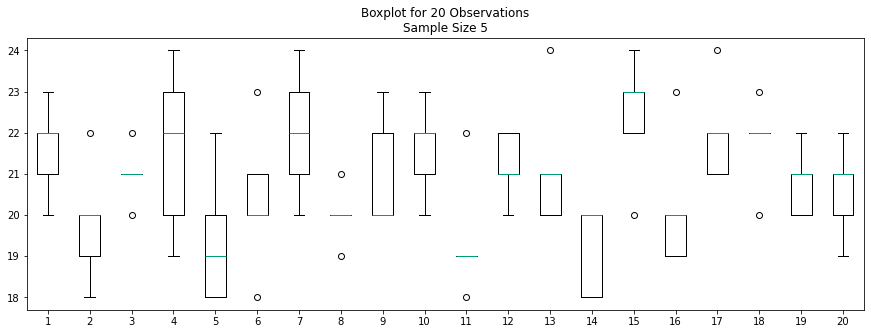

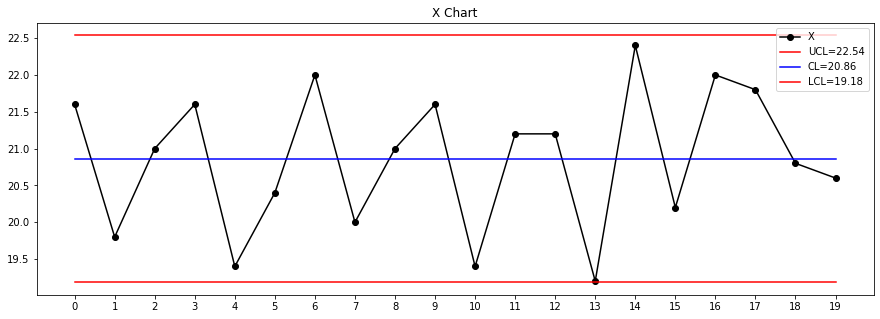

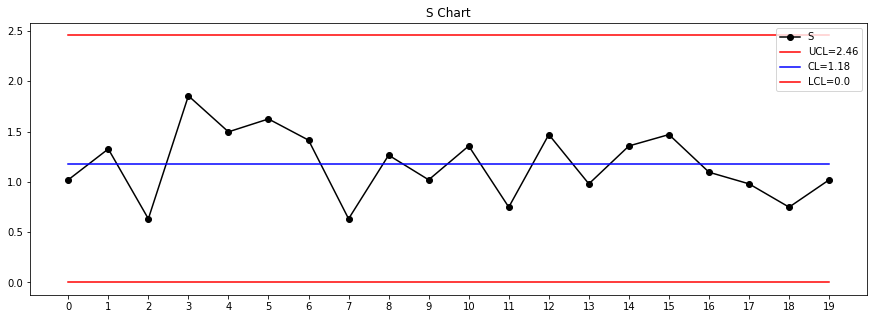

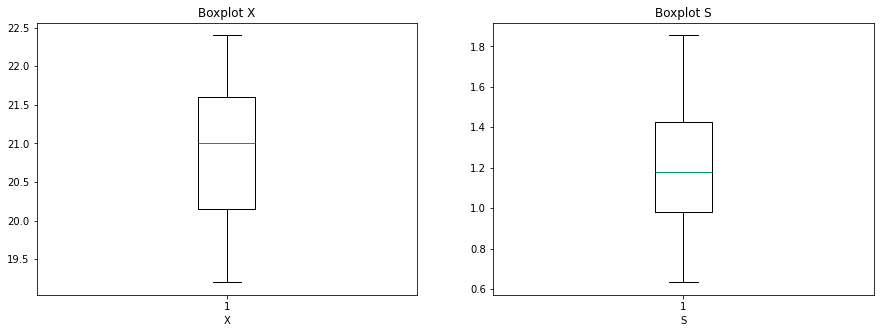

In [42]:
chart = XS_ControlChart()
chart.fit(data2)
chart.ControlChart(A3 = 1.427 ,B3 = 0 ,B4 = 2.089)